# DESARROLLO LABORATORIO 8 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import math
from sklearn.preprocessing import KBinsDiscretizer # Para aplicar Discretizacion

In [2]:
os.chdir("D:\Social Data Consulting\Python for Data Science\data")

In [4]:
fileCsv="php9xWOpn.csv"
df_fall_placa_acero = pd.read_csv(fileCsv,  sep=',')
df_fall_placa_acero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1941 non-null   int64  
 1   V2      1941 non-null   int64  
 2   V3      1941 non-null   int64  
 3   V4      1941 non-null   int64  
 4   V5      1941 non-null   int64  
 5   V6      1941 non-null   int64  
 6   V7      1941 non-null   int64  
 7   V8      1941 non-null   int64  
 8   V9      1941 non-null   int64  
 9   V10     1941 non-null   int64  
 10  V11     1941 non-null   int64  
 11  V12     1941 non-null   int64  
 12  V13     1941 non-null   int64  
 13  V14     1941 non-null   int64  
 14  V15     1941 non-null   float64
 15  V16     1941 non-null   float64
 16  V17     1941 non-null   float64
 17  V18     1941 non-null   float64
 18  V19     1941 non-null   float64
 19  V20     1941 non-null   float64
 20  V21     1941 non-null   float64
 21  V22     1941 non-null   float64
 22  

**_1. Encontrar el numero de bins con la tecnica de Sturges_**

In [6]:
n=len(df_fall_placa_acero)
k=1+math.log2(n)
k=round(k,0)
k

12.0

**_2. Discretizacion por intervalos de igual amplitud de la variable "V9" (Grafico de Barras)_**

In [7]:
#Creando una instancia de KBinsDiscretizer
amplitud=KBinsDiscretizer(n_bins=12,
                         encode='ordinal',
                         strategy='uniform')# uniform por ser intervalos de igual amplitud

In [8]:
nuevo_amplitud=amplitud.fit_transform(df_fall_placa_acero[['V9']])

In [9]:
df_fall_placa_acero['V9_amplitud']=nuevo_amplitud
df_fall_placa_acero.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,Class,V9_amplitud
0,42,50,270900,270944,267,17,44,24220,76,108,...,-0.2913,0.5822,1,0,0,0,0,0,1,4.0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,-0.1756,0.2984,1,0,0,0,0,0,1,4.0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,-0.1228,0.2150,1,0,0,0,0,0,1,5.0
3,853,860,369370,369415,176,13,45,18996,99,126,...,-0.1568,0.5212,1,0,0,0,0,0,1,5.0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,-0.1992,1.0000,1,0,0,0,0,0,1,2.0


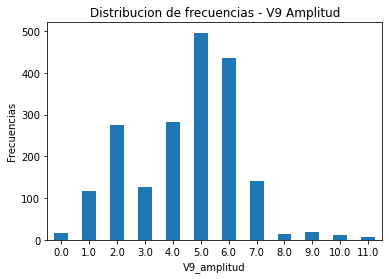

In [11]:
df_fall_placa_acero.groupby(df_fall_placa_acero.V9_amplitud).size().plot(kind='bar',rot=0)
plt.title('Distribucion de frecuencias - V9 Amplitud')
plt.ylabel('Frecuencias')
plt.show()

**_3. Discretizacion por cuantil de la variable "V19" (Grafico de barras)_**

In [12]:
#Creando una instancia de KBinsDiscretizer
cuantil=KBinsDiscretizer(n_bins=4,
                         encode='ordinal',
                         strategy='quantile')

In [14]:
nuevo_cuantil=cuantil.fit_transform(df_fall_placa_acero[['V19']])

In [15]:
df_fall_placa_acero['V19_cuantil']=nuevo_cuantil
df_fall_placa_acero['V19_cuantil']=df_fall_placa_acero['V19_cuantil'].astype(np.int64)
df_fall_placa_acero.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V27,V28,V29,V30,V31,V32,V33,Class,V9_amplitud,V19_cuantil
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.5822,1,0,0,0,0,0,1,4.0,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.2984,1,0,0,0,0,0,1,4.0,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.2150,1,0,0,0,0,0,1,5.0,2
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5212,1,0,0,0,0,0,1,5.0,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,1.0000,1,0,0,0,0,0,1,2.0,0


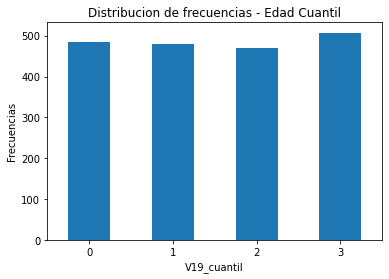

In [16]:
df_fall_placa_acero.groupby(df_fall_placa_acero.V19_cuantil).size().plot(kind='bar',rot=0)
plt.title('Distribucion de frecuencias - Edad Cuantil')
plt.ylabel('Frecuencias')
plt.show()

**_4. Discretizacion por kmeans de la variable "V15" (Grafico de barras)_**

In [17]:
#Creando una instancia de KBinsDiscretizer
kmeans=KBinsDiscretizer(n_bins=4,
                         encode='ordinal',
                         strategy='kmeans')

In [18]:
nuevo_kmeans=kmeans.fit_transform(df_fall_placa_acero[['V15']])

In [19]:
df_fall_placa_acero['V15_kmeans']=nuevo_kmeans
df_fall_placa_acero['V15_kmeans']=df_fall_placa_acero['V15_kmeans'].astype(np.int64)
df_fall_placa_acero.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V28,V29,V30,V31,V32,V33,Class,V9_amplitud,V19_cuantil,V15_kmeans
0,42,50,270900,270944,267,17,44,24220,76,108,...,1,0,0,0,0,0,1,4.0,1,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,1,0,0,0,0,0,1,4.0,1,3
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,1,0,0,0,0,0,1,5.0,2,3
3,853,860,369370,369415,176,13,45,18996,99,126,...,1,0,0,0,0,0,1,5.0,1,3
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,1,0,0,0,0,0,1,2.0,0,0


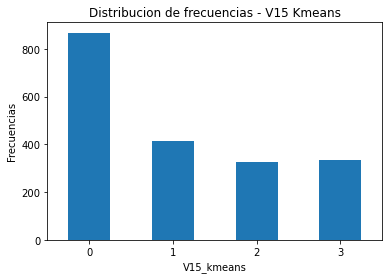

In [22]:
df_fall_placa_acero.groupby(df_fall_placa_acero.V15_kmeans).size().plot(kind='bar',rot=0)
plt.title('Distribucion de frecuencias - V15 Kmeans')
plt.ylabel('Frecuencias')
plt.show()